# ***1. Data Cleaning***

In [1]:
import numpy as np
import pandas as pd

In [2]:
hr_data = pd.read_excel("/content/HR.xlsx")

In [3]:
hr_data.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [4]:
# Display MISSING values
hr_data.isna()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Check MISSING values
hr_data.isna().sum()

,0
Attrition,0
Business Travel,0
CF_age band,0
CF_attrition label,0
Department,0
Education Field,0
emp no,0
Employee Number,0
Gender,0
Job Role,0


In [6]:
# # Drop rows with MISSING values
# hr_data_cleaned = hr_data.dropna()

# # OR fill MISSING values with mean for numeric columns
# hr_data_filled = hr_data.fillna(hr_data.mean(numeric_only=True))

In [7]:
# Count the number of DUPLICATE rows
hr_data.duplicated().sum()

0

In [13]:
# # Remove DUPLICATEs
hr_data_cleaned = hr_data.drop_duplicates()

In [9]:
# # Convert a specific column to datetime
# hr_data_cleaned['Date_Column'] = pd.to_datetime(hr_data_cleaned['Date_Column'], errors='coerce')

In [10]:
# # Example of detecting outliers using the interquartile range (IQR)
# Q1 = hr_data_cleaned['Sales_Amount'].quantile(0.25)
# Q3 = hr_data_cleaned['Sales_Amount'].quantile(0.75)
# IQR = Q3 - Q1

# # Define acceptable range
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out the outliers
# hr_data_cleaned = hr_data_cleaned[(hr_data_cleaned['Sales_Amount'] >= lower_bound) &
#                                         (hr_data_cleaned['Sales_Amount'] <= upper_bound)]

In [11]:
# # Example of currency conversion (assuming USD to EUR with a conversion rate)
# conversion_rate = 0.85
# hr_data_cleaned['Sales_Amount_EUR'] = hr_data_cleaned['Sales_Amount'] * conversion_rate

In [14]:
# Save the cleaned data to a new Excel file
cleaned_file_path = '/content/Cleaned_HRData.xlsx'
hr_data_cleaned.to_excel(cleaned_file_path, index=False)

# ***2. EDA(Exploratory Data Analysis)***

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned Excel file
file_path = '/content/Cleaned_HRData.xlsx'
hr_data = pd.read_excel(file_path)

In [16]:
# Descriptive statistics for numerical columns
print(hr_data.describe())

# Summary for categorical columns
print(hr_data.describe(include=['object']))

       Employee Number  Training Times Last Year          Age  \
count      1470.000000               1470.000000  1470.000000   
mean       1024.865306                  2.799320    36.923810   
std         602.024335                  1.289271     9.135373   
min           1.000000                  0.000000    18.000000   
25%         491.250000                  2.000000    30.000000   
50%        1020.500000                  3.000000    36.000000   
75%        1555.750000                  3.000000    43.000000   
max        2068.000000                  6.000000    60.000000   

       CF_current Employee   Daily Rate  Distance From Home  Employee Count  \
count          1470.000000  1470.000000         1470.000000          1470.0   
mean              0.838776   802.485714            9.192517             1.0   
std               0.367863   403.509100            8.106864             0.0   
min               0.000000   102.000000            1.000000             1.0   
25%               1

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-26-395d246cd6ae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='viridis')


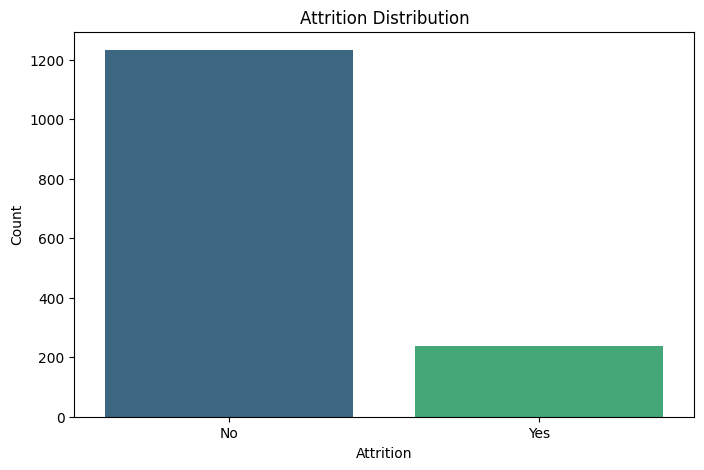

In [26]:
# Attrition Count
attrition_counts = hr_data['Attrition'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='viridis')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

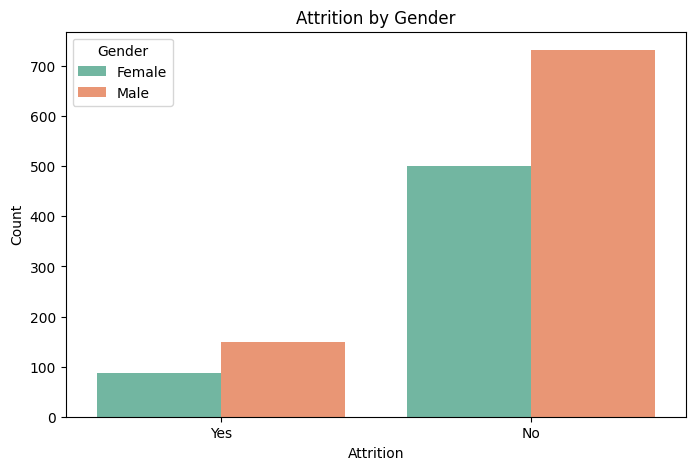

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', hue='Gender', data=hr_data, palette='Set2')
plt.title('Attrition by Gender')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

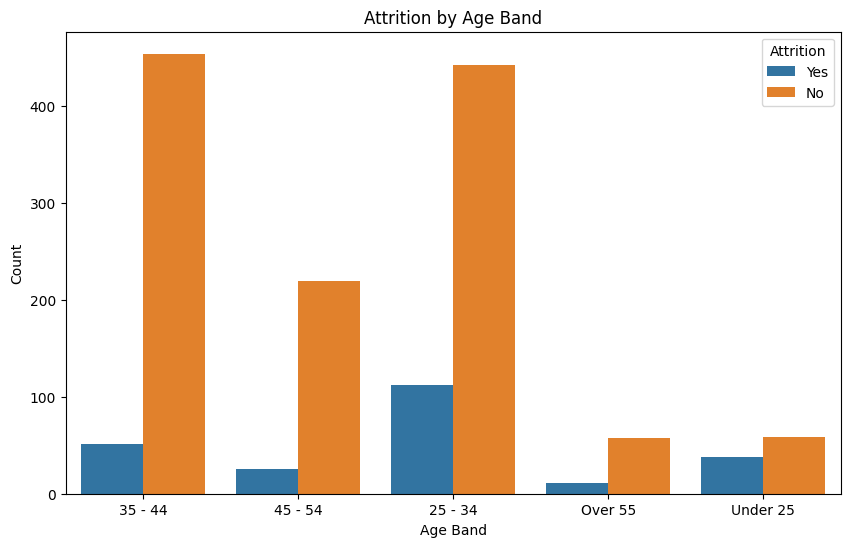

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CF_age band', hue='Attrition', data=hr_data)
plt.title('Attrition by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.show()


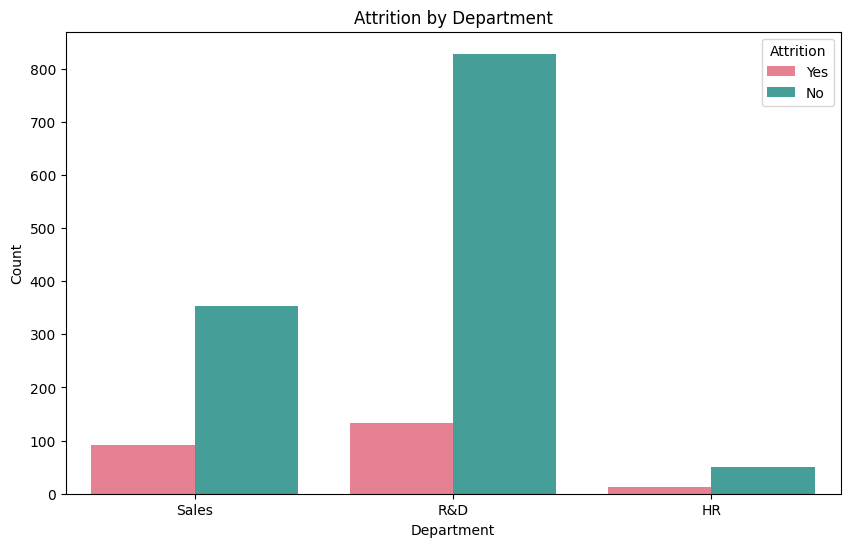

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=hr_data, palette='husl')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


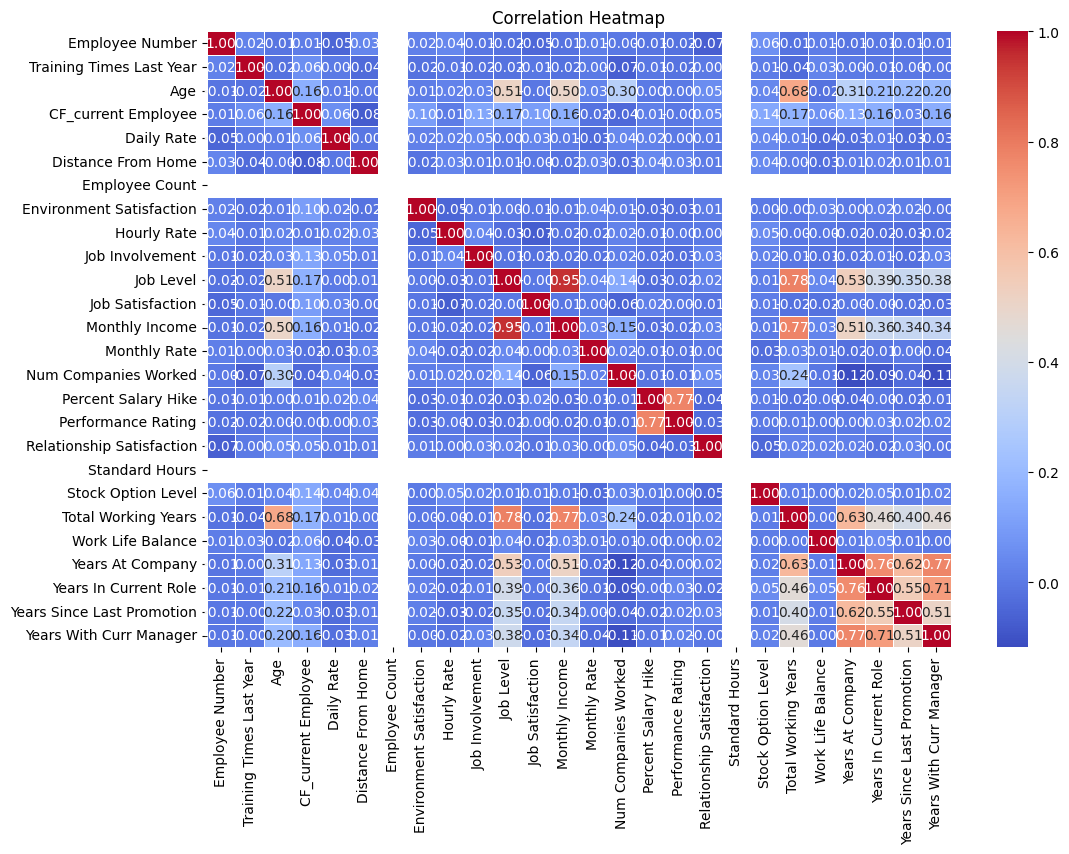

In [30]:
# Check for numeric columns
numeric_cols = hr_data.select_dtypes(include='number')

# Correlation Matrix
correlation_matrix = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()